#### IMPORTING LIBRARYS

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
from matplotlib import text

#### LOADING AND PREPARING DATA

In [2]:
diabetes=load_diabetes() 
X=diabetes.data 
y=diabetes.target

df_diabetes=pd.DataFrame(X) 
df_diabetes["target"]=y 
df_diabetes=df_diabetes.sample(frac=1) 
df_diabetes 


,0,1,2,3,4,5,6,7,8,9,target
65,-0.045472,0.050680,-0.024529,0.059744,0.005311,0.014970,-0.054446,0.071210,0.042345,0.015491,163.0
76,-0.030942,0.050680,0.028284,0.070073,-0.126781,-0.106845,-0.054446,-0.047981,-0.030751,0.015491,170.0
69,0.016281,-0.044642,-0.046085,-0.005671,-0.075870,-0.061438,-0.013948,-0.039493,-0.051401,0.019633,178.0
244,-0.060003,0.050680,0.054152,-0.019442,-0.049727,-0.048912,0.022869,-0.039493,-0.043985,-0.005220,187.0
25,-0.067268,0.050680,-0.012673,-0.040099,-0.015328,0.004636,-0.058127,0.034309,0.019199,-0.034215,202.0
...,...,...,...,...,...,...,...,...,...,...,...
407,0.027178,-0.044642,0.092953,-0.052723,0.008063,0.039709,-0.028674,0.021024,-0.048362,0.019633,140.0
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021394,0.015491,64.0
113,0.019913,0.050680,0.014272,0.063187,0.014942,0.020293,-0.047082,0.034309,0.046661,0.090049,297.0
134,-0.074533,-0.044642,0.043373,-0.033214,0.012191,0.000252,0.063367,-0.039493,-0.027129,-0.046641,103.0


#### VISUALIZING DATA

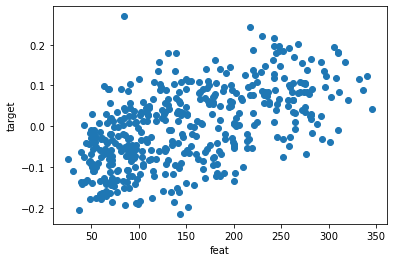

In [3]:
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X) 
arrayFeat=pd.DataFrame(arrayFeat) 
arrayFeat.columns= ["COMP1"]

plt.scatter(y,arrayFeat)   
plt.xlabel("feat") 
plt.ylabel("target") 
plt.show() 



#### LOADING MODEL

In [4]:
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=4),
    "ADA BOOST":AdaBoostRegressor(), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)), 
    "KNN":KNeighborsRegressor(),
    "RNN":RadiusNeighborsRegressor(),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0)}

## CROSS VAL

In [94]:
models=getModels() 
scores={}
for i in models.keys(): 
    scores[i]=np.absolute(np.mean(cross_val_score(models[i],X,y,cv=10)) )

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 


scores

{'LINEAR REGRESSION': 0.461962361958337,
 'RANDOM FOREST': 0.41263573616159793,
 'ADA BOOST': 0.38978386857956004,
 'DECISION TREE': 0.31280000400524866,
 'SGD': 0.46189566415317673,
 'KNN': 0.33289005677540284,
 'RNN': 0.03976678687512114,
 'EXTRA TREES': 0.43661151032703865,
 'GRADIENT BOOST': 0.37279116606441476}

#### SEEING RESULT GRAPH

0.0


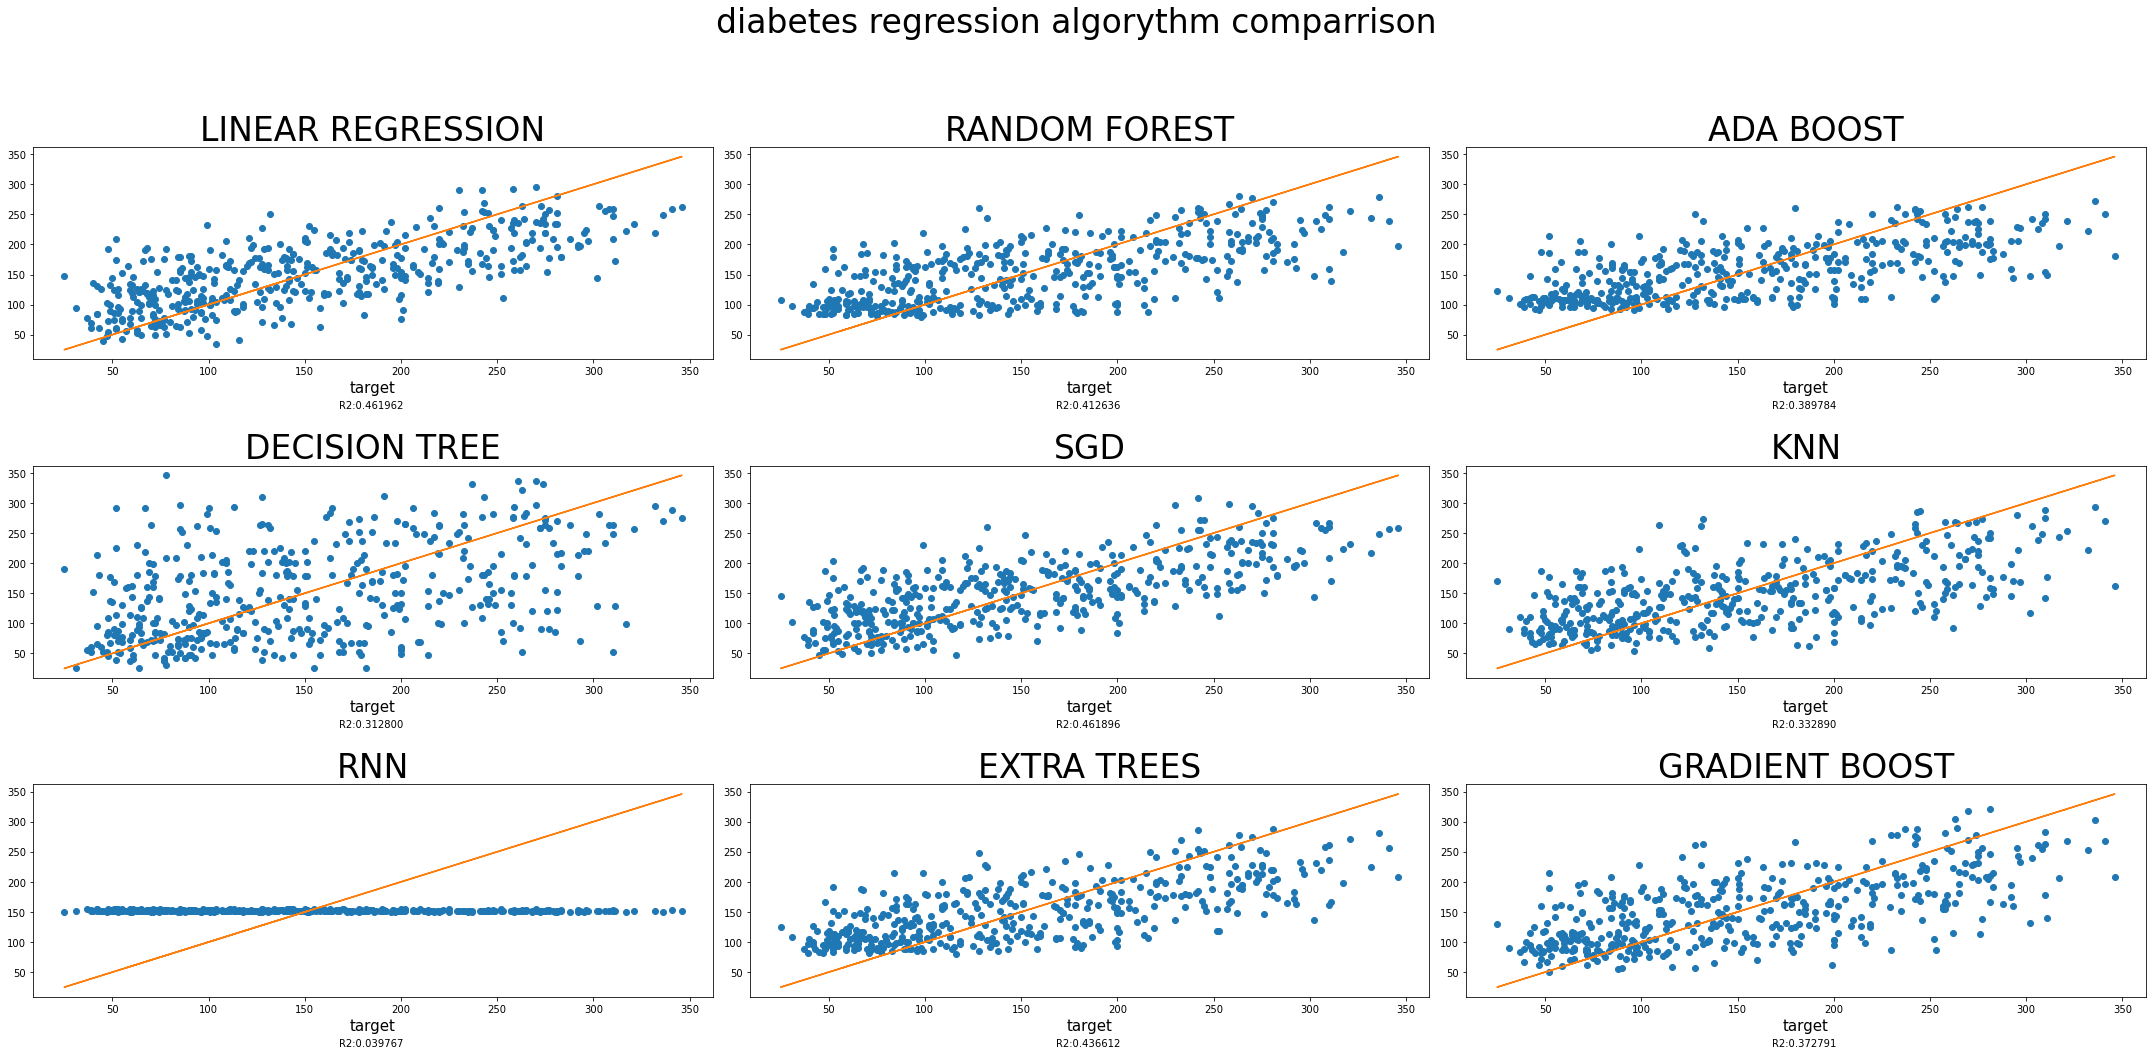

In [127]:


predictions= []
for i in models.keys():
    predictions.append(cross_val_predict(models[i],X,y,cv=10))

#predictions["target"]=y  
predictions=pd.DataFrame(predictions) 
#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
predictions["models"]=models.keys()
predictions=np.transpose(predictions)  

""" aux=y 
aux=aux.tolist() 
aux.append(None) 
aux=np.array(aux) 
aux  """  
auxdic=scores
auxdic=list(auxdic.items())
print(np.round(auxdic[0][1]))
fig,ax =plt.subplots(3,3) 
fig.suptitle("diabetes regression algorythm comparrison",size=33)   
fig.set_figwidth(30)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1]   
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j
        ax[i,j].plot(y,predictions.drop("models")[oneDIndex],"o")  
        ax[i,j].set_title(predictions.at["models",oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=350)  
        m,b=np.polyfit(y,y,deg=1)
        ax[i,j].plot(y,m*y+b)
        centerish=ax[i,j].get_xbound()[1]/2
        centerishY=ax[i,j].get_ybound()[1]/2
        ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5)